# Zinia Project Info

We're using BLEAnalysis [github repo](github.com/SheffieldMLtracking/BLEanalysis).

$p(\theta|y) = p(y|\theta)p(\theta)/p(y)$

$\theta$ relative angle to the bee (wrt the direction the antenna is pointing). Later once we guess $\theta$ we can just add on the angle of the transmitter... If we guess the bee is 30 degrees clockwise from the direction the transmitter's facing, and we know it's facing 50 degrees, then the actual direction of the bee is 80 degrees.

$p(\theta|y) \propto p(y|\theta)$

In [11]:
from BLEanalysis.angleinference import AnglesUsePatternMeans, normalise_logs_to_ps
import numpy as np
import matplotlib.pyplot as plt
from BLEanalysis.synthetic import SignalDemo
#TODO: Chris - this is quite fragile!
demo = SignalDemo(sample_interval=200,obstimes=np.linspace(0,5,20))

index_of_test = 19

#The BLEanalysis.angleinference module provides classes/methods for infering theta given some observations...
angles = AnglesUsePatternMeans(noisevar=3**2)
demoburst = demo.burst_observations[index_of_test] #generate synthetic observations in a 'burst'.

Standardising angles and times (shifting by 38.00 degrees)
Standardising angles and times (shifting by 38.00 degrees)


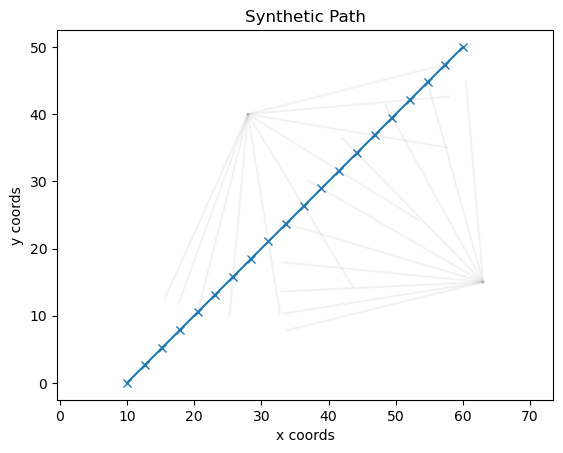

In [12]:
demo.plot()

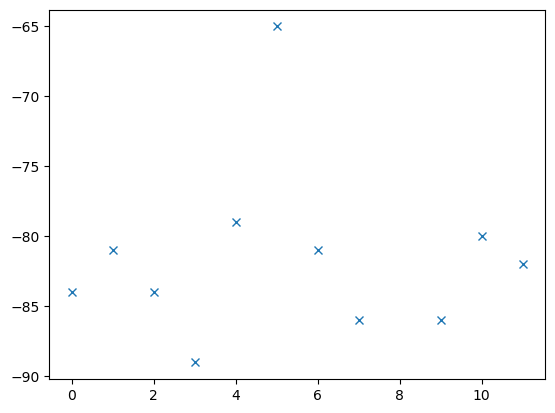

In [13]:
plt.plot(demoburst['rssis'],'x')
#plt.plot(demoburst['angles'],'.')

In [14]:
print("There are %d samples, used in %d bursts." % (np.sum([len(db['rssis']) for db in demo.burst_observations]),len(demo.burst_observations)))

There are 240 samples, used in 20 bursts.


In [15]:
demoburst

{'transmitter_position': array([63., 15.]),
 'rssis': array([-84., -81., -84., -89., -79., -65., -81., -86.,  nan, -86., -80.,
        -82.]),
 'angles': array([ 1.5725575 ,  2.16596944,  2.81174126,  3.4226065 ,  3.99856516,
        -1.63884833, -1.06288967, -0.34730468,         nan,  0.82206592,
         1.46783774,  2.04379639])}

Text(0.5, 1.0, '94.89909245378777')

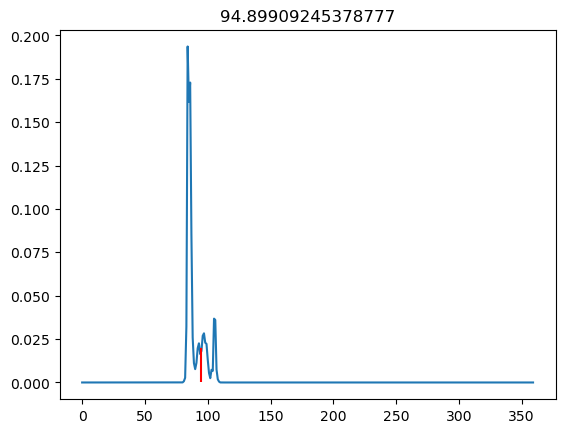

In [16]:
logps,_,_,_ = angles.infer(demoburst['rssis'],demoburst['angles'])
plt.plot(np.linspace(0,359,360),normalise_logs_to_ps(logps)) #e^logps
#plt.plot(logps)

#this gets the true angle to the synthetic bee:
#true location of the bee minus the location of the transmitter (and doing trig to get the angle).
v = demo.trueLocations[index_of_test]-demoburst['transmitter_position']
true_angle = np.rad2deg(np.arctan2(v[1],v[0])) % 360
plt.vlines(true_angle,0,0.02,color='red')
plt.title(true_angle)

In [17]:
demo.burst_observations

[{'transmitter_position': array([28., 40.]),
  'rssis': array([-82., -66., -76., -85., -92., -88., -80., -82., -88., -85.,  nan,
         -66.]),
  'angles': array([7.66597032, 1.99365025, 2.62196878, 3.30264719, 3.93096572,
         4.54183096, 5.22250937, 5.83337461, 6.46169314, 7.07255838,
                nan, 2.04601013])},
 {'transmitter_position': array([63., 15.]),
  'rssis': array([-84., -86., -92., -79., -79., -87., -89., -74., -65., -82., -80.,
         -88.]),
  'angles': array([4.27960818, 4.87302012, 5.50133865, 6.07729731, 6.70561584,
         7.29902778, 7.89243973, 8.48585167, 9.04435703, 3.44185013,
         4.0003555 , 4.66358061])},
 {'transmitter_position': array([28., 40.]),
  'rssis': array([-86., -85., -70., -63., -82.,  nan, -85.,  nan, -83., -84., -89.,
         -81.]),
  'angles': array([6.56481693, 7.22804205, 7.83890729, 2.14913392, 2.84726562,
                nan, 4.10390269,        nan, 5.32563316, 6.00631157,
         6.68698998, 7.3327618 ])},
 {'transmi

In [18]:
from BLEanalysis.pathinference import Path_ProbabilityDensitiesToBee
from BLEanalysis.kernels import ExponentiatedQuadraticKernel

k = ExponentiatedQuadraticKernel(7.0,50.0)
path = Path_ProbabilityDensitiesToBee(demo.obstimes,demo.burst_observations,k,3.0,6)
path.run(200,learning_rate=2.0)

Standardising angles and times (shifting by 38.00 degrees)
Optimising mean...
iteration    0:   23886.9
iteration   50:   20714.4
iteration  100:   20692.1
iteration  150:   20691.9
Optimising mean and covariance...
iteration    0:    8335.6
iteration   50:    5219.0
iteration  100:    3307.9
iteration  150:    2306.9


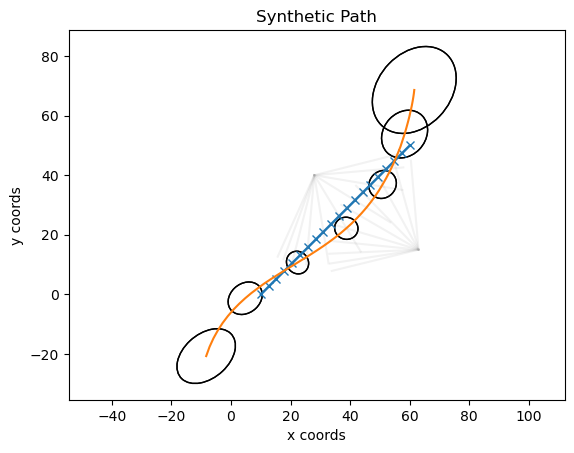

In [19]:
demo.plot()
path.plot(n_std=1)

In [20]:
demo.trueLocations

array([[10.        ,  0.        ],
       [12.63157895,  2.63157895],
       [15.26315789,  5.26315789],
       [17.89473684,  7.89473684],
       [20.52631579, 10.52631579],
       [23.15789474, 13.15789474],
       [25.78947368, 15.78947368],
       [28.42105263, 18.42105263],
       [31.05263158, 21.05263158],
       [33.68421053, 23.68421053],
       [36.31578947, 26.31578947],
       [38.94736842, 28.94736842],
       [41.57894737, 31.57894737],
       [44.21052632, 34.21052632],
       [46.84210526, 36.84210526],
       [49.47368421, 39.47368421],
       [52.10526316, 42.10526316],
       [54.73684211, 44.73684211],
       [57.36842105, 47.36842105],
       [60.        , 50.        ]])

In [21]:
demo.obstimes

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [30]:
test_times = np.linspace(0,5,100)

#temporary...
#def get_location_at_time(t):
#    return np.array([(1*t)*10+10,(1*t)*10])
#true_locations_at_test_times = np.array([get_location_at_time(t) for t in test_times])

true_locations_at_test_times = np.array([demo.get_location_at_time(t) for t in test_times])

m,_ = path.get_predictions(test_times)
predLocations = np.c_[m[:len(test_times)],m[len(test_times):]]

#

In [31]:
print("The MSE is %0.1f m^2" % np.mean((true_locations_at_test_times-predLocations)**2)) #SSE

The MSE is 13.4 m^2


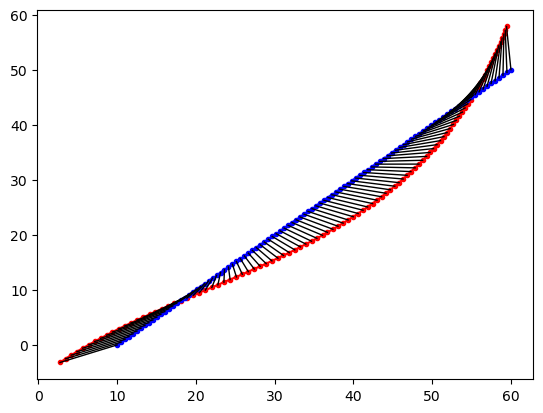

In [33]:
plt.plot(predLocations[:,0],predLocations[:,1],'r.-')
plt.plot(true_locations_at_test_times[:,0],true_locations_at_test_times[:,1],'b.--')


for p,t in zip(predLocations,true_locations_at_test_times):
    plt.plot([p[0],t[0]],[p[1],t[1]],'-k',lw=1)

# The Task

Given you can make 30 samples in 5 seconds, what is the best way to distribute them to minimise say the MSE of the bee's location?

Typically this is a choice of how many bursts there are...

For example:
- You could have 3 bursts in those 5 seconds, each burst with 10 samples. (10s,30s,50s)
- Or... 10 bursts (i.e. every 0.5 seconds) but each burst will only have 3 samples in.
- Or somewhere in between.

Currently 240 samples are allowed --> first need to reduce that!